In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Расчет многофазного потока в штуцере

In [3]:
# Физико-химические свойства флюида PVT
gamma_gas_ = 0.9 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.86 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 200 # замерной газовый фактор, м3/м3;
Pb_ = 100 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
gamma_wat_kf_ = 1.2 # 
gas_only = 0 #
# Параметры потока флюида
fw_ = 70 # объемная обводненность, %;
T_choke = 80 # температура, С;
# Конструкция 
d_pipe = 70 # диаметр трубы до и после штуцера, мм;
d_choke = 10 # диаметр штуцера (эффективный), мм;
Qliq_ = 80 # дебит жидкости в ст. условиях, м3/сут;
Pbuf_ = 26 # давление на входе, атм;
Plin_ = 20 # давление на выходе, атм;
qgas_free = 0 # свободный газ. дополнительный к pvt потоку, м3/сут;
#Зададим направление расчета относительно потока:
Calc_along_flow1 = 1 # расчет по потоку (давление на выкиде по известному давлению на входе);
Calc_along_flow0 = 0 # расчет против потока (давление на входе по известному давлению на выкиде);
PVTstr_ = UniflocVBA.PVT_encode_string(gamma_gas_, gamma_oil_, gamma_wat_, Rsb_, Rp_, Pb_, Tres_, Bob_, muob_, gas_only=gas_only)

Рассчитаем калибровочный параметр

In [4]:
calibr_choke = UniflocVBA.MF_calibr_choke_fast(Qliq_, fw_, d_choke, Pbuf_, Plin_, d_pipe, T_choke, PVTstr_)
print('Калибровочный параметр = ' + str(calibr_choke[0][0]))
c_calibr = calibr_choke[0][0]

Калибровочный параметр = 0.9227106912371777


Также стоит обратить внимание на функцию MF_calibr_choke.
Она позволяет выбирать тип калибровки (0 - подбор параметра с_calibr; 1 - подбор диаметра штуцера; 2 - подбор газового фактора; 3 - подбор обводненности; 4 - подбор дебита жидкости)

Расчет против потока

In [5]:
# Создадим массивы давлений и дебита жидкости для расчета против потока:
pline_0 = 1
pline_n = 32
dp = 5 
pline_atm = np.arange(pline_0, pline_n, dp) # массив давлений на выходе;
Q_0 = 0
Q_n = 230
dQ = 10 
Q_sm3day = np.arange(Q_0, Q_n, dQ) # дебит жидкости;
p_choke_list0 = [[],[],[],[],[],[],[]]
i = -1
for p in pline_atm:
    i+=1
    for q in Q_sm3day:
        p_choke_0 = UniflocVBA.MF_p_choke_atma(q, fw_, d_choke, p, Calc_along_flow0, d_pipe, T_choke, c_calibr, PVTstr_, qgas_free)
        p_choke_list0[i].append(p_choke_0[0][0])
        

Зависимость давления на выходе из штуцера от дебита при различных диаметрах и давлениях на входе с учетом калибровочного коэффициента

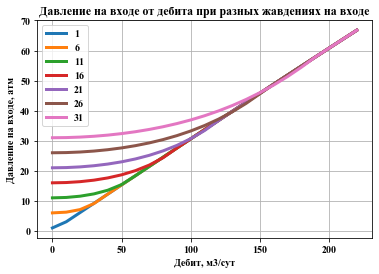

In [6]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman'

for i in range(7):
    plt.grid(True)
    plt.title('Давление на входе от дебита при разных жавдениях на входе', color='black', family='fantasy')
    plt.ylabel('Давление на входе, атм', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_sm3day, p_choke_list0[i], linewidth=3)
plt.legend(('1', '6', '11', '16', '21', '26', '31')) 
plt.show()

Расчет по потоку

In [7]:
# Создадим массивы давлений и дебита жидкости для расчета по потоку:
pbuf_0 = 10
pbuf_n = 36
dp = 5 
pbuf_atm = np.arange(pbuf_0, pbuf_n, dp) # массив давлений на входе;
Q_0 = 0
Q_n = 170
dQ = 7 
Q_m3day = np.arange(Q_0, Q_n, dQ) # дебит жидкости;

p_choke_list1 = [[],[],[],[],[],[]]
i = -1
for p in pbuf_atm:
    i+=1
    for q in Q_sm3day:
        p_choke_1 = UniflocVBA.MF_p_choke_atma(q, fw_, d_choke, p, Calc_along_flow1, d_pipe, T_choke, c_calibr, PVTstr_, qgas_free)
        p_choke_list1[i].append(p_choke_1[0][0])
        

Зависимость давления на входе в штуцере от дебита с учетом калибровочного коэффициента

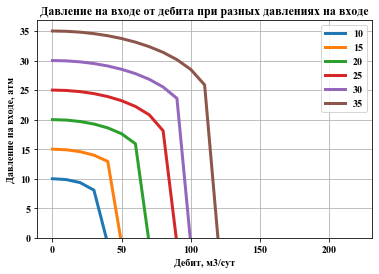

In [8]:
for i in range(6):
    plt.grid(True)
    plt.title('Давление на входе от дебита при разных давлениях на входе', color='black', family='fantasy')
    plt.ylabel('Давление на входе, атм', color='black', family='fantasy')
    plt.xlabel('Дебит, м3/сут', color='black', family='fantasy')
    plt.plot(Q_sm3day, p_choke_list1[i], linewidth=3)
plt.legend(('10','15', '20', '25', '30', '35')) 
plt.ylim(0,)
plt.show()